In [1]:
%matplotlib inline
import sys, os, time
import rasterio as rio
import rasterio.mask as masker
import shapefile as shp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

landsatTileList = r"/home/dsa/DSA/images/scene_list.txt"
landsatDirectory = r"/home/dsa/DSA/images/LC08_L1GT_209117_20140101_20170427_01_T2"
coastMaskShpfile = r"/home/dsa/DSA/vectors/Coastline_high_res_polygon_v7.1.shp"

outputDirectory = r"/home/dsa/DSA/vectors/"
outputFileExt = r"_burjo_output.tif"

assert os.path.isfile(landsatTileList)
assert os.path.isdir(landsatDirectory)
assert os.path.isfile(coastMaskShpfile)

In [3]:
tiles = open(landsatTileList).read().splitlines()
print(tiles)

['LC08_L1GT_209117_20140101_20170427_01_T2']


In [4]:
startTime = time.ctime()

In [5]:
print("ArcPy Rock masking script started: %s" % startTime)

ArcPy Rock masking script started: Mon Oct 14 06:39:05 2019


shapefile Reader
    14601 shapes (type 'POLYGON')
    14601 records (3 fields)


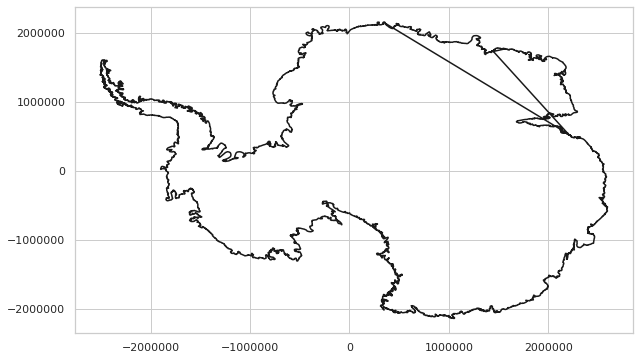

In [21]:
coast = shp.Reader(coastMaskShpfile)
print(coast)
figsize = (10,6)
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=figsize)


def plot_map(shape, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot shapefile
    '''
    plt.figure(figsize = figsize)
    id = 0
    for poly in shape.shapeRecords():
        x = [i[0] for i in shape.shape().points[:]]
        y = [i[1] for i in shape.shape().points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) and (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id += 1
        if id % 1000 == 0:
            print(id)
    if x_lim is not None and y_lim is not None:
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    plt.show()
# this takes a long time to run
# plot_map(coast)

biggest = max(coast.shapes(), key=lambda x: len(x.points))

plt.figure(figsize = figsize)
x = [i[0] for i in biggest.points]
y = [i[1] for i in biggest.points]
plt.plot(x, y, 'k')
plt.show()

In [ ]:
for i in range(len(tiles)):
    
    thisTileID = tiles[i]
    thisTileFile = landsatDirectory + "/" + thisTileID
    outFilename = outputDirectory + "/" + thisTileID
    
    fmt = "\t%d of %d."
    print(fmt % (i + 1, len(tiles)))
    tic = time.time()